Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs', split='train')
df = dataset.to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg')
df_DA_US.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
709703,Data Analyst,Enterprise Master & Reference data Governance ...,"Tampa, FL",via Ladders,Full-time,False,"Florida, United States",2023-01-04 11:31:22,False,False,United States,year,115000.0,NaN,"Citigroup, Inc",None,None
552571,Data Analyst,Health Policy and Data Analyst,"Anaheim, CA",via Indeed,Full-time,False,"California, United States",2023-08-30 19:00:59,False,True,United States,year,77500.0,NaN,"KCS, Inc.","[outlook, word, excel, sharepoint]","{'analyst_tools': ['outlook', 'word', 'excel',..."
517267,Data Analyst,Remote Data Analyst II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-09-22 10:59:52,False,True,United States,year,60000.0,NaN,The Difference Card,"[sql, sql server, excel, word, visio, powerpoi...","{'analyst_tools': ['excel', 'word', 'visio', '..."
627250,Data Analyst,Data Services Data Analyst - (Immediate),"Fort Worth, TX",via Adzuna,Full-time,False,"Texas, United States",2023-06-07 12:01:00,False,False,United States,year,66600.0,NaN,IDEA Public Schools,"[sql, ssrs]","{'analyst_tools': ['ssrs'], 'programming': ['s..."
415405,Data Analyst,"Data & Analytics Analyst - Virtual, USA",Anywhere,via Indeed,Full-time,True,Georgia,2023-08-16 17:14:31,False,False,United States,year,69500.0,NaN,Diversified,"[python, sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
386329,Data Analyst,Data Analyst,"Media, PA",via Indeed,Full-time,False,"New York, United States",2023-06-30 18:00:25,True,True,United States,year,67500.0,NaN,Payer Matrix,None,None
284039,Data Analyst,Data Analyst II - BIS,"Wilmington, DE",via Ladders,Full-time,False,"New York, United States",2023-05-17 07:00:07,False,False,United States,year,115000.0,NaN,City National Bank (CNB),"[sas, sas, sql, crystal, t-sql, vba, c++, c#, ...","{'analyst_tools': ['sas', 'sharepoint', 'sap',..."
254572,Data Analyst,Expert Risk Adjustment Data Analyst - REMOTE,"St. Louis, MO",via ProActuary,Full-time,False,"Illinois, United States",2023-08-13 07:01:25,False,False,United States,year,114183.5,NaN,Allscripts,"[sas, sas, sql, snowflake]","{'analyst_tools': ['sas'], 'cloud': ['snowflak..."
458090,Data Analyst,Data Analyst,United States,via LinkedIn,Full-time,False,"Texas, United States",2023-06-26 14:04:19,False,False,United States,year,85000.0,NaN,Insight Global,"[sql, python, react, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'li..."
187869,Data Analyst,Data Analyst,Anywhere,via Robert Half,Full-time,True,"New York, United States",2023-05-26 14:59:59,True,False,United States,year,125000.0,NaN,Robert Half,[flow],{'other': ['flow']}


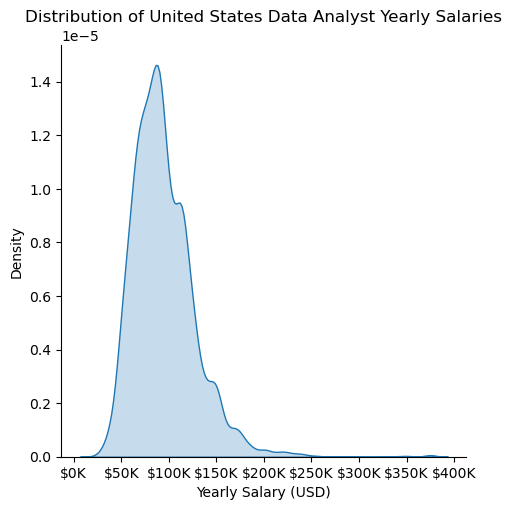

In [24]:
sns.displot(data=df_DA_US, x=df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [6]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


In [50]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

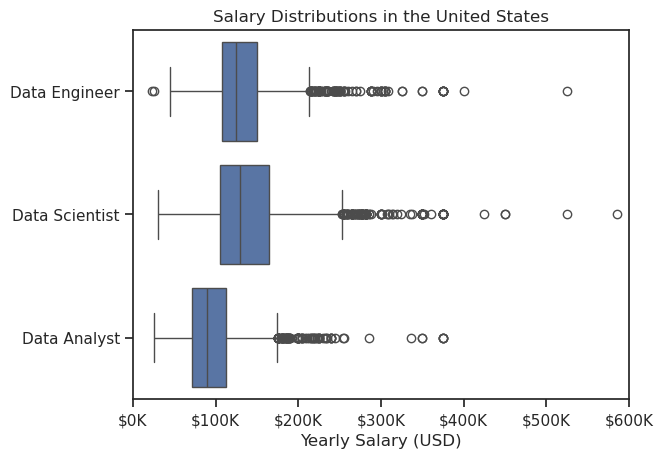

In [51]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [52]:
df_DA_US = df_DA_US.explode('job_skills')

In [53]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [54]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


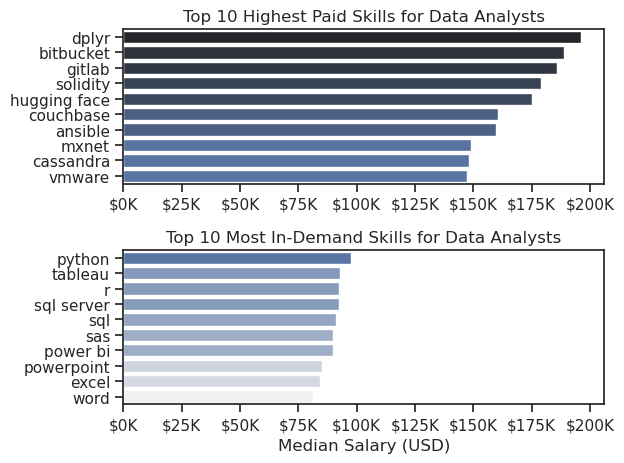

In [73]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')
sns.barplot(df_DA_top_pay, x='median', y='job_skills', ax=ax[0], hue='median', palette='dark:b_r')

ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


In [56]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
    for the variable to take.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.
    
    .. note::
   